In [11]:
import pandas as pd
import os
import itertools

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict

#!python -m pip install -U gensim
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel 

import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append('..\data')
    sys.path.append('..\src')

from utility import plot_words

import warnings
warnings.filterwarnings('ignore') 

### Read the wiki articles from direcotry then pre-process data
* Read files
* Convert to lower case
* Tokenize the text
* Retain alphabetic words: alpha_only
* Remove all stop words: no_stops

In [12]:
# Read the wiki articles from direcotry then pre-process data

directory = "..\data\Wikipedia articles"
final_tkens = []

for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory, filename)
        
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()

            # Tokenize the text
            tokens = word_tokenize(content.lower())

            # Retain alphabetic words: alpha_only
            tokens = [t for t in tokens if t.isalpha()]

            # Remove all stop words: no_stops
            stop_words = set(stopwords.words('english'))
            tokens = [t for t in tokens if t not in stop_words]

            final_tkens.append(tokens)

### Creating a corpus with gensim
* Create a Dictionary from the articles
* Create a Corpus

In [13]:
# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(final_tkens)

# Select the id for "computer": computer_id
# computer_id = dictionary.token2id.get("computer")
# Use computer_id with the dictionary to print the word
# print(dictionary.get(computer_id))

# Create a Corpus: corpus
corpus = [dictionary.doc2bow(article) for article in final_tkens]

# Print the first 10 word ids with their frequency counts from the fifth document
# print(corpus[4][:10])

### Gensim bag-of-words

* Use the gensim corpus and dictionary to see the most common terms in the 5th document

debugging 39
system 19
software 16
tools 14
computer 12


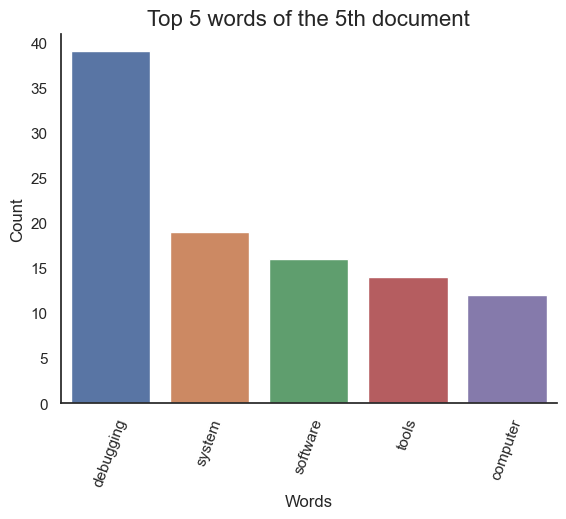

In [14]:
# Save the fifth document: doc
doc = corpus[4]

# Sort the doc for frequency: bow_doc
# The sorting should be based on the second element (w[1]) of each element in doc.
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)

Words = []
Count = []
for word_id, word_count in bow_doc[:5]:
    Words.append(dictionary.get(word_id))
    Count.append(word_count)
df = pd.DataFrame({"Words": Words, "Count": Count})

plot_words(df, "Words", "Count", "Top 5 words of the 5th document")


### Gensim bag-of-words

* Use the gensim corpus and dictionary to see the most common terms in all documents. 

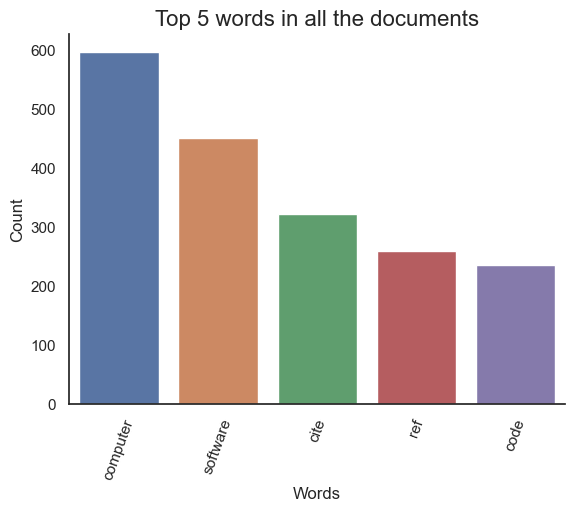

In [15]:
# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

# Create a sorted list from the defaultdict: sorted_word_count 
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

# Print the top 5 words across all documents alongside the count
Words = []
Count = []
for word_id, word_count in sorted_word_count[:5]:
    Words.append(dictionary.get(word_id))
    Count.append(word_count)
df = pd.DataFrame({"Words": Words, "Count": Count})

plot_words(df, "Words", "Count", "Top 5 words in all the documents")

### TF-IDF (Term Frequency - Inverse Document Frequency) with gensim
### Determine the most important words in each document in the corpus.

![image.png](..\data\tfidf_eq.jpg) 

wolf 0.22123867454207014
debugging 0.19978292671581308
fence 0.1769909396336561
debugger 0.13576852865117667
squeeze 0.1327432047252421


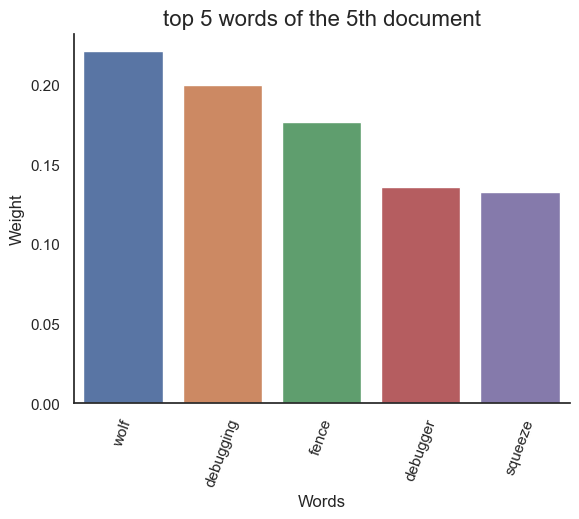

In [16]:
# Create a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

doc = corpus[4]
# Calculate the tfidf weights of doc: tfidf_weights
tfidf_weights = tfidf[doc]

# Print the first five weights
#print(tfidf_weights[:5])

# Sort the weights from highest to lowest: sorted_tfidf_weights
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:5]:
    print(dictionary.get(term_id), weight)

# Print the top 5 words across all documents alongside the count
Words = []
Weight = []
for term_id, weight in sorted_tfidf_weights[:5]:
    Words.append(dictionary.get(term_id))
    Weight.append(weight)
df = pd.DataFrame({"Words": Words, "Weight": Weight})

plot_words(df, "Words", "Weight", "top 5 words of the 5th document")